# Applied Linear Algebra - Lab 5

Eigen Values

### Contents:


* [Kernels in Machine Learning](#Kernels-in-ML)
* [The Kernel Trick](#The-Kernel-Trick)
* [Kernel Approximation](#-Kernel-Approximation)
* [Preproccessing](#Preproccessing)
* [Exercise 1](#Exercise-1)
* [Exercise 2](#Exercise-2)



#Kernels in ML

Kernel in Machine Learning is a measure of similarity between two points. For example, if one’s task is to recognize different categories. Kernel in Machine Learning will try to assign a low value to data that has the same objects, and a high value to another set of objects. Here the thing to notice is kernel provides a faster way to find similarity than that of comparing similarity point by point.



#The Kernel Trick

Kernels can map current feature space to some higher dimentional feature space while doing computation in original low dimentional space.

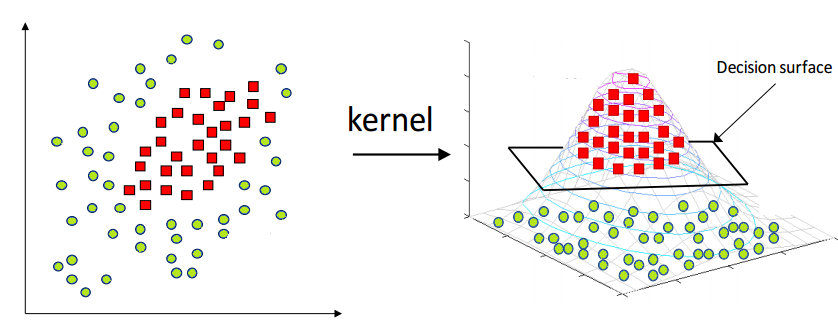

In above example we transformed data from 2-dimentional space to 3-dimentional space. in 2-dimentional space data was not linearly seprable but in 3-dimentional space we can seprate data using a 2-d surface.

There are many kernel functions like polynomial functions, RBF and even dot product is a kernel functions.

Kernel matrix or Gram matrix is a $n \times n$ matrix that each element $a_{ij}$ corresponds to a kernel function between the $i_{th}$ and $j_{th}$ input vectors. so kernel matrix is a symmetric matrix and more precisely it's a positive definite matrix.

#Kernel Approximation

One of the main drawbacks of kernel-based classifiers is that the computational complexity required to find the solution scales as $O(n^3)$, where $n$ is the number of training examples. in this lab we create a reduced-rank approximation to the Gram matrix K giving rise to $O(m^2n)$ computational complexity where $m$ is musch smaller than $n$.
The key assumption in this approximation is that the kernel function is of rank m. That means that any kernel matrix is going to have rank at most m.
Since K is symmetric and positive definite we can use eigenvalue decomposition as follows:

$$K=U\Delta U^T$$

where eigenvectores stored in $U$ with shape $n \times m$ and eigenvalues arranged in $\Delta$, an $m \times m$ diagonal matrix.

Lets partition K into four blocks $K_{11}$, $K_{21}$, $K_{21}^T$ and $K_{22}$ where $K_{11}$ is a $m \times m$ full rank matrix.

$$K = \begin{bmatrix}
K_{11} & K_{21}^T \\
K_{21} & K_{22}
\end{bmatrix}$$

$$K=U\Delta U^T\\
= \begin{bmatrix}
U_1 \\
U_2
\end{bmatrix}
\Delta \begin{bmatrix}
U_1 \\
U_2
\end{bmatrix}^T = \begin{bmatrix}
U_1 \Delta U_1^T & U_1 \Delta U_2^T \\
U_2 \Delta U_1^T & U_2 \Delta U_2^T
\end{bmatrix}
$$


we know that $K_{21} = U_2 \Delta U_1^T$. with right multiplying $(\Delta U_1^T)^{-1} = U_1 \Delta^{-1}$ we get:


$$U_2 = K_{21} U_1 \Delta ^{-1}$$
$$K_{22} = U_2ΔU_2^T \\ = (K_{21}U_1Δ^{-1})\Delta(K_{21}U_1Δ^{-1})^T \\ = K_{21} K_{11}^{-1} K_{21}^T = (K_{21}K_{11}^{-\frac{1}{2}})(K_{21}K_{11}^{-\frac{1}{2}})^T$$

using this we can now find a $m$-dimentional feature space $\Phi$.

$$\Phi = \begin{bmatrix}
K_{11}^{\frac{1}{2}} \\
K_{21}K_{11}^{-\frac{1}{2}}
\end{bmatrix}$$

we can verify that $\Phi$ corresponds to the correct kernel matrix.

$$ \Phi \Phi^T = \begin{bmatrix} K_{11}^{\frac{1}{2}} \\ K_{21}K_{11}^{-\frac{1}{2}}\end{bmatrix}\begin{bmatrix} K_{11}^{\frac{1}{2}} \\ K_{21}K_{11}^{-\frac{1}{2}}\end{bmatrix}^T$$
$$ $$
$$ = \begin{bmatrix} K_{11} & K_{21}^T \\ K_{21} & K_{21}K_{11}^{-1}K_{21}^T\end{bmatrix} = K$$

So, all we need to do is train our regular learning model with the m-dimensional features $\Phi$.
Now, for an individual data point $x$, the features in $\Phi$ correspond to:
$$\phi(x) = \begin{bmatrix}
k(x, x_1) ... k(x, x_m)
\end{bmatrix}K_{11}^{-\frac{1}{2}}$$

and since $K_{11}$ is positive definite matrix we can calculate $K_{11}^{-\frac{1}{2}}$ as:

$$K_{11}^{-\frac{1}{2}} = U \Delta ^ {-\frac{1}{2}}U^T = U \frac{1}{\sqrt{\Delta}} U^T$$

#Preproccessing



In [39]:
!wget -O train.csv https://www.dropbox.com/s/f4dzu371hgw1k9t/train.csv?dl=0

--2023-08-28 05:18:20--  https://www.dropbox.com/s/f4dzu371hgw1k9t/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/f4dzu371hgw1k9t/train.csv [following]
--2023-08-28 05:18:20--  https://www.dropbox.com/s/raw/f4dzu371hgw1k9t/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc43fcbd73cb3fc43e256e2bed1.dl.dropboxusercontent.com/cd/0/inline/CCpKvrKpjkeiFKm_Va615VgsiO_bQ3NrtQrMTE2Zvxh845TkIMQJ-rkNb6j7JtEW1r5L3n4aBhoyS6gjTfRN9N2-vgyWz-rIvqClPJzMOFeXa0LO3AkLhIgjZsn3_H95ckRE83RZhSUITmX9ES6eG2aC/file# [following]
--2023-08-28 05:18:20--  https://ucc43fcbd73cb3fc43e256e2bed1.dl.dropboxusercontent.com/cd/0/inline/CCpKvrKpjkeiFKm_Va615VgsiO_bQ3NrtQrMTE2Zvxh845TkIMQJ-rkNb6j7JtEW1r5L3n4aBhoyS6gjTfRN9N2-vgyWz-rIvqClPJzMOF

In [40]:
!wget -O test.csv https://www.dropbox.com/s/p5hk56v493psyd5/test.csv?dl=0

--2023-08-28 05:18:21--  https://www.dropbox.com/s/p5hk56v493psyd5/test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5hk56v493psyd5/test.csv [following]
--2023-08-28 05:18:21--  https://www.dropbox.com/s/raw/p5hk56v493psyd5/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4fe8f146de14fa5fd1a889e965.dl.dropboxusercontent.com/cd/0/inline/CCqj5D1I3HP_qGu9JvCAIzjUb-4SM7Pte_lSHpujVtecxML6QIQ_5MFWi0rfitucjceTYNH5SKaNwDY-UyQBlIc0wWCXyANJoaLZ3z5eoTlgF_Xdn5dmeYvnlFk16gpOsvX2zwNcRheadvzhQNYV8hAE/file# [following]
--2023-08-28 05:18:22--  https://uc4fe8f146de14fa5fd1a889e965.dl.dropboxusercontent.com/cd/0/inline/CCqj5D1I3HP_qGu9JvCAIzjUb-4SM7Pte_lSHpujVtecxML6QIQ_5MFWi0rfitucjceTYNH5SKaNwDY-UyQBlIc0wWCXyANJoaLZ3z5eoTlgF

In [41]:
from sklearn import preprocessing
import pandas as pd


train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

label_encoder = preprocessing.LabelEncoder()

non_numerical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
for i in non_numerical_columns:
    label_encoder.fit(train_df[i])
    train_df[i] = label_encoder.transform(train_df[i])


    label_encoder.fit(test_df[i])
    test_df[i] = label_encoder.transform(test_df[i])

X_train = train_df.iloc[:, 2:-1].values
X_test = test_df.iloc[:, 2:-1].values
y_train = train_df['satisfaction'].values
y_test = test_df['satisfaction'].values


s_scaler = preprocessing.StandardScaler()
s_scaler.fit(X_train)
X_train_standard = s_scaler.transform(X_train)
X_test_standard = s_scaler.transform(X_test)

In [42]:
X_train_standard.shape

(103594, 22)

# Exercise 1

in this exercise er are going to implement kernel approximation and use it on simple perceptron and compare kernelized version with normal version. Perceptron is a linear classifier and with using kernels we can map our current feature space to a higher dimentional feature space. calculate $K_{11}^{-\frac{1}{2}}$.

In [43]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

m = 3000

X11 = X_train_standard[0:m]

# use rbf_kernel for k11
K11 = rbf_kernel(X_train_standard[0:m], gamma=0.025)

# using np.linalg.eig() we can get Delta and U
Delta, U = np.linalg.eig(K11)

# normalization_ == K11^{-1/2}
normalization_ = np.dot(U * 1. / np.sqrt(Delta), U.T)

#Exercise 2

using $K_{11}^{-\frac{1}{2}}$ we can transform our old feature space to new feature space using:

$$\Phi = \begin{bmatrix}
K_{11}\\K_{21}
\end{bmatrix}K_{11}^{-\frac{1}{2}}$$

In [44]:
train_kernel = rbf_kernel(X_train_standard, X_train_standard[0:m], gamma=0.025)
test_kernel = rbf_kernel(X_test_standard, X_train_standard[0:m], gamma=0.025)

In [45]:
X_train_higher_dimention = np.dot(train_kernel, normalization_.T)
X_test_higher_dimention = np.dot(test_kernel, normalization_.T)

In [46]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [47]:
normal_perceptron_model = Perceptron(max_iter=5000)
normal_perceptron_model.fit(X_train_standard, y_train)
y_normal_pred = normal_perceptron_model.predict(X_test_standard)
accuracy_score(y_normal_pred, y_test)

0.8270575058896227

In [48]:
# accuracy should be 0.946

kernel_perceptron_model = Perceptron(max_iter=5000)
kernel_perceptron_model.fit(X_train_higher_dimention, y_train)
y_kernel_pred = kernel_perceptron_model.predict(X_test_higher_dimention)
accuracy_score(y_kernel_pred, y_test)

0.9460471942223767